#  INDEPTH MASTERY OF XGBOOST ALGORITHM

## Problem statement 
 below is a dataset that we will be using to predict the price of insurance we will be explaining the columns shortly 

 ### In the below model we wil be looking at the insurance prices one  pays to an insurance company(value of premiums)  .A health insurance is based in some several factors  . In the foollowing dataset the factors include :
1.Age - Ba sed on the age of the customer we can be able to determine the value of premiums one will pay in normal scenario the older one is the higher the premium rate is likely to be.

2.Sex - Based on sex we can be able to determine the amount one will indeed pay as premiums  .Will one pay more as a male while compared to a female? we will answer this question when we plot a correlation matrix and feature importance plot. 

3.BMI - BMI (Body Mass Index) is a commonly used measure to assess a person's 
  weight status and is calculated using the following formula:

  BMI = weight / (height^2)

  where weight is in kilograms and height is in meters. BMI is a numerical value that provides an indication of whether a person   is underweight, normal weight, overweight, or obese.

  The BMI categories are generally defined as follows:

  Underweight: BMI < 18.5
  Normal weight: 18.5 <= BMI < 25
  Overweight: 25 <= BMI < 30
  Obese: BMI >= 30 .

4 .Number of children - based on the number of children we can be able do determine whether one will pay higher premiumns or not   which ideally is the case.

5 Region - We will look where each customer comes from and based on region one comes from can we really  predict the  amount     one will pay as premiums? we wil se shortly whether the region one comes from really affects the insurance premium

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# The code below is used for splitting the dataset into 2.One for Training the model and the other for testing its perfomance
from sklearn.model_selection import train_test_split
# The model name as written is Linear regression
from sklearn.linear_model import LinearRegression

# The module below provides a range of metrics used for evaluating the perfomance of the model
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse

In [3]:
#We will  then load the dataset
df =pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#We will be lookinng for null values 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [27]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\stilinski\AppData\Local\Temp\ipykernel_6200\1255922574.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


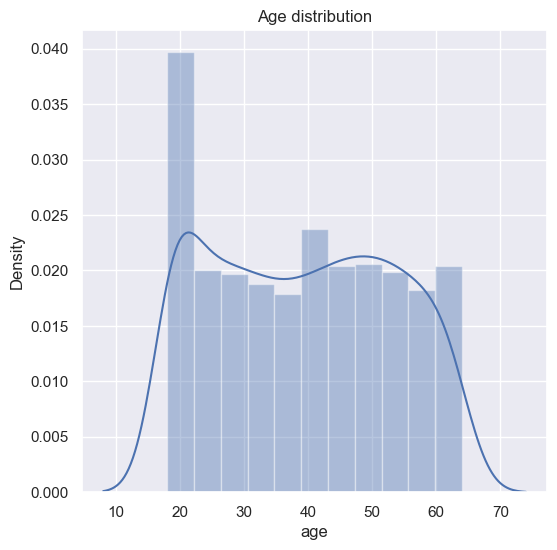

In [5]:
# below we will be looking for the age distribution using a distplot

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age distribution')
plt.show()

In [6]:
###  well our  customers age is not skewed to any direction ad is distributed almost fairly more young people are insuring thats for sure and mid 40's and also 60's

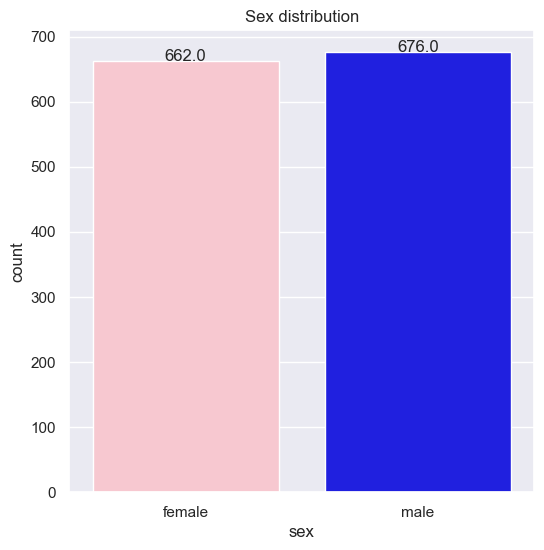

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))

# Set the color palette for the countplot
colors = {'female': 'pink', 'male': 'blue'}
sns.set_palette(colors.values())

ax = sns.countplot(x='sex', data=df)
plt.title('Sex distribution')

# Add the count values as text on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha="center")

plt.show()

In [8]:
###  In the above plot we can really see that more male are taking insurance covers than their feamle counterparts

C:\Users\stilinski\AppData\Local\Temp\ipykernel_11176\334131519.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


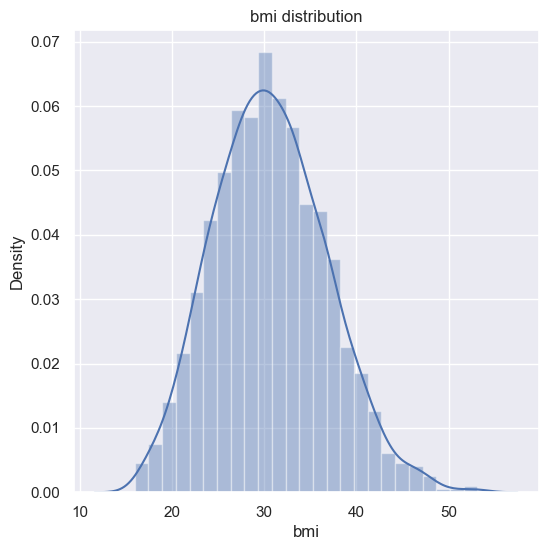

In [31]:

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('bmi distribution')
plt.show()

In [10]:
###  Our customers bmi is mainly from 25 to oround 38  from the information i gave above while discussing the problem statement is that from 25 -30 they are overweight  and past 30 they are obese thus most of our patients are taking  insurance cover beacuse they are not in good sahape and some may have more fears  and we can outrightly predict that a higher obese would actually attract a higher premium rate charge

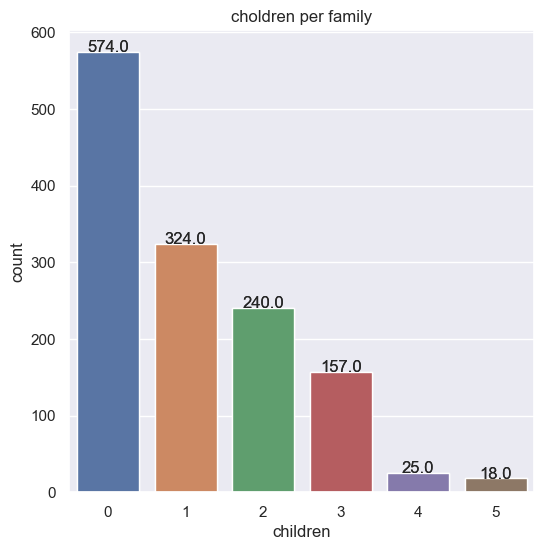

In [32]:
#in the code below we will be looking for the value of each count of each family and number of children using a countplot
plt.figure(figsize =(6,6))
sns.countplot(x='children',data=df)
plt.title('choldren per family')
ax = sns.countplot(x='children', data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha="center")

plt.show()

###  Most  patients are childless and this could be brought about by some could still be single thus as we looked before we saw that most people are in thie twenties .

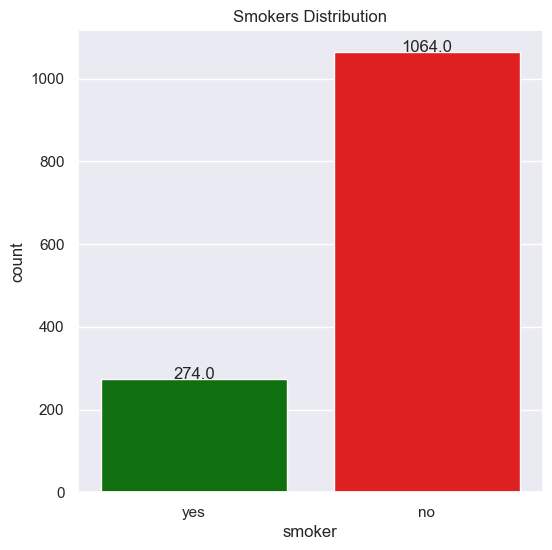

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))

# Set the color palette for the countplot
colors = {'yes': 'green', 'no': 'red'}
sns.set_palette(colors.values())

ax = sns.countplot(x='smoker', data=df)
plt.title('Smokers Distribution')

# Add the count values as text on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha="center")

plt.show()

### In the above plot we have the distribution of smokers though not by sex but we apparently have less smokers. Thus by default a smoker has a higher risk of diseases and thus we expect the insurance premiums to be higher

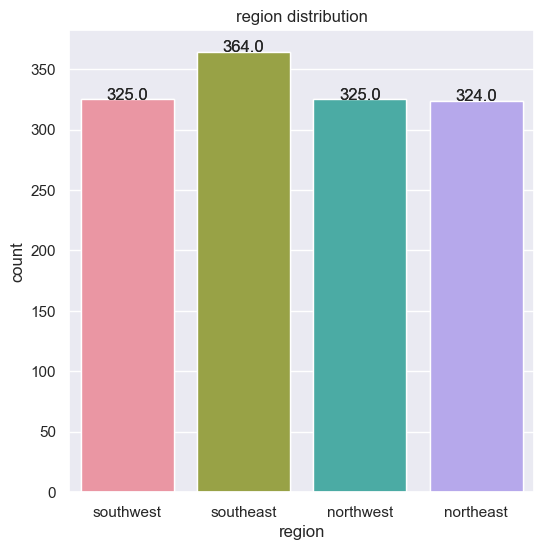

In [13]:
# Below we willl be looking for a count  of the values from each region using a countplot

plt.figure(figsize =(6,6))
sns.countplot(x='region',data=df)
plt.title('region distribution')
ax = sns.countplot(x='region', data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha="center")

plt.show()

C:\Users\stilinski\AppData\Local\Temp\ipykernel_11176\1607533726.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


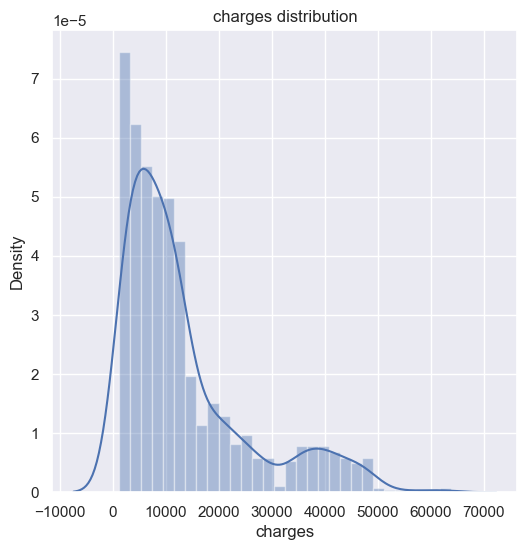

In [14]:
#below we will be looking for the charges distribution using  a distplot

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('charges distribution')
plt.show()

### The charges distributiion are left skewed thus the insurance cost is generally lower and this may also be a  factor ( its affordable)

In [15]:
### since models dont actually understand non-numeric data we will encode our data and change it to numeric form

In [16]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [47]:
X = preprocessor.fit_transform(X)

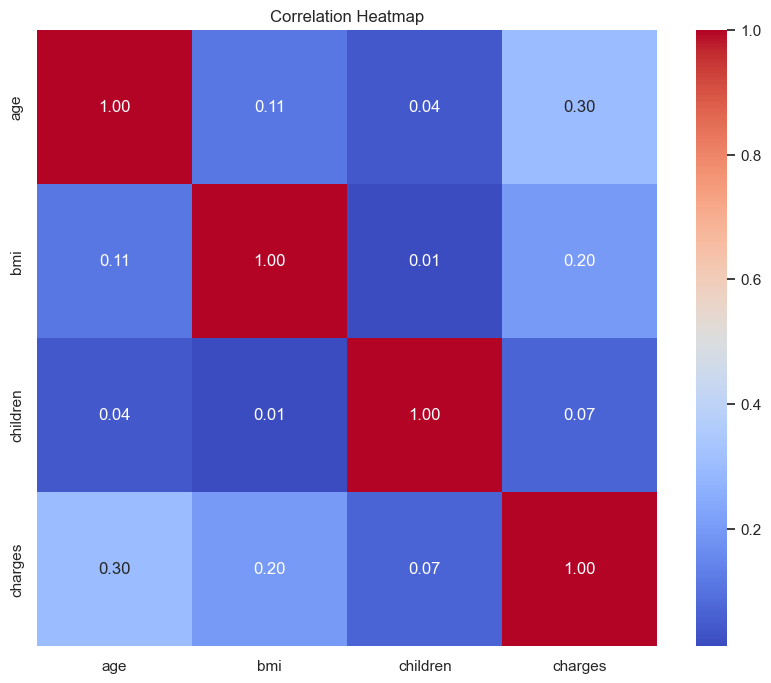

In [7]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### this is a correlation heatmap we will how our data is correlated to our model  
1. Age , bmi and children are correlated to the   charges alook those are the only numerical features we had 
2. When we shift to the non-numerical features the ones we have ecoded (sex,smoker , region) all tend to have an inverse correlation to our data at this point we cannot actually determine which columns to get rid off in fear of reducing complexity and diensionality

We will determine our X columns and y columns and then we would fit our model 

In [8]:
# for the below code we will  be dropping the cahrges colum as we will be using it as our target data (Y)
X =df.drop(columns='charges',axis =1)
y =df['charges']

In [9]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1070, 6), (268, 6))

In [10]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Define the numeric and categorical features
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

# Define the transformers
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),        
    ]
)

# Apply the transformers to preprocess the data
X_transformed = preprocessor.fit_transform(X)

# Apply the transformers to preprocess the data

In [13]:
# Create an XGBoost regressor object
xgb = XGBRegressor()

# Train the model
xgb.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = xgb.predict(X_train)

# Calculate R2 score and MAE for training set
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Train R-squared:", r2_train)
print("Train MAE:", mae_train)

# Make predictions on the test set
y_test_pred = xgb.predict(X_test)

# Calculate R2 score and MAE for the test set
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print("Test R-squared:", r2_test)
print("Test MAE:", mae_test)

Train R-squared: 0.9939566607528609
Train MAE: 491.13911325281106
Test R-squared: 0.8340766965506468
Test MAE: 2897.89186930638


 ### In the above data we can see that our model is definitely overfitting we can see that the r2 score of the train data is 0.99  and that of the test data is 0.82 thus kinda of this huge difference we can clearly see that our model overfits we will need to actually improve our  model by introducing some parameters for our model from then we can tune our model and get the very best out of our model.

###  The following are the parameters :
learning_rate: It determines the step size at each boosting iteration. A lower learning rate makes the model more robust but requires more iterations to converge.

max_depth: It specifies the maximum depth of each decision tree. Deeper trees can capture complex relationships but may overfit the data if not properly controlled.

n_estimators: It sets the number of boosting iterations or the total number of trees in the model. More trees can improve performance, but there is a trade-off with computational complexity.

subsample: It determines the fraction of the training instances to be used for training each tree. It helps in reducing overfitting by introducing randomness.

colsample_bytree: It specifies the fraction of features (columns) to be used when constructing each tree. Similar to subsampling, it introduces randomness and reduces overfitting.

reg_alpha: It controls L1 regularization (Lasso) on the leaf weights. It encourages sparsity in the model by adding a penalty term to the loss function.

reg_lambda: It controls L2 regularization (Ridge) on the leaf weights. It adds a penalty term to the loss function to prevent overfitting and stabilize the model.

min_child_weight: It sets the minimum sum of instance weights (Hessian) needed in a child node to continue splitting. It helps in preventing overfitting by enforcing a minimum number of samples in leaf nodes.

gamma: It specifies the minimum loss reduction required to make a further partition on a leaf node. Higher values result in fewer splits, which can help control the complexity of the model.


In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define the numeric and categorical features
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

# Define the transformers
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),        
    ]
)

# Apply the transformers to preprocess the data
X_transformed = preprocessor.fit_transform(X)

# Split the transformed data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.6, 0.8],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [0.5, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1],
}

# Create an XGBoost regressor object
xgb = XGBRegressor()

# Perform grid search
search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters: ", search.best_params_)
print("Best MAE: ", -search.best_score_)

# Get the best model with the optimized parameters
best_model = search.best_estimator_

# Make predictions using the best model on the test set
y_test_pred = best_model.predict(X_test)

# Calculate MAE and R-squared for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Test Mean Absolute Error:", mae_test)
print("Test R-squared:", r2_test)

# Make predictions using the best model on the train set
y_train_pred = best_model.predict(X_train)

# Calculate MAE and R-squared for the train set
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print("Train Mean Absolute Error:", mae_train)
print("Train R-squared:", r2_train)



Best Parameters:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 0.5, 'subsample': 0.8}
Best MAE:  2468.346738438449
Test Mean Absolute Error: 2355.776419899196
Test R-squared: 0.8713646674319167
Train Mean Absolute Error: 2309.9648140707504
Train R-squared: 0.8624634425442453


#### After tuning our model we can clearly see that we have reduced the overfitting of our model and actually we have the r2 score of the train data as0.84 and that of the test data as 0.83 means chances of overfitting to be very slim and thus we can say to some extent that our model is perfoming the best it can ever perfom. 